In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:05<00:00, 172MB/s]
100% 812M/812M [00:05<00:00, 144MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg', 'cat.3877.jpg', 'cat.6013.jpg', 'cat.12459.jpg', 'dog.5586.jpg', 'cat.10732.jpg', 'dog.11877.jpg', 'dog.7902.jpg', 'cat.7195.jpg', 'dog.3587.jpg', 'cat.8508.jpg', 'dog.7225.jpg', 'cat.6285.jpg', 'dog.9900.jpg', 'cat.10723.jpg', 'dog.5987.jpg', 'dog.10149.jpg', 'dog.6532.jpg', 'dog.3443.jpg', 'cat.7340.jpg', 'cat.6676.jpg', 'dog.8255.jpg', 'cat.2762.jpg', 'cat.9537.jpg', 'cat.7171.jpg', 'dog.2052.jpg', 'cat.8372.jpg', 'dog.5048.jpg', 'dog.348.jpg', 'dog.10321.jpg', 'cat.4359.jpg', 'cat.11647.jpg', 'dog.9213.jpg', 'cat.10426.jpg', 'dog.578.jpg', 'dog.1443.jpg', 'dog.2158.jpg', 'cat.1978.jpg', 'dog.1382.jpg', 'cat.5677.jpg', 'cat.9560.jpg', 'cat.11292.jpg', 'dog.5755.jpg', 'dog.6156.jpg', 'cat.9868.jpg', 'cat.5990.jpg', 'dog.12005.jpg', 'dog.3158.jpg', 'cat.9480.jpg', 'cat.11424.jpg', 'cat.9401.jpg', 'dog.272.jpg', 'dog.566.jpg', 'cat.2474.jpg', 'dog.8223.jpg', 'cat.5714.jpg', 'dog.7889.jpg', 'cat.11190.jpg', 

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

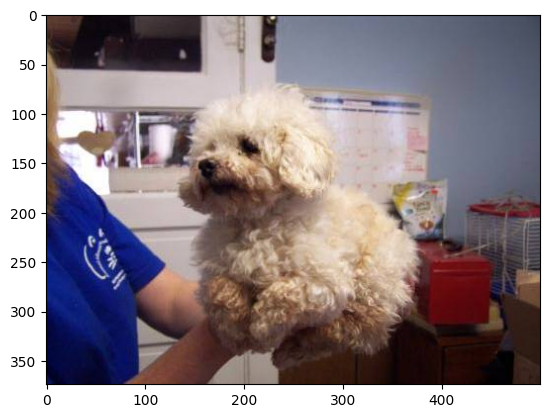

In [14]:
img = mpimg.imread('/content/train/dog.7902.jpg')
imgplt = plt.imshow(img)
plt.show()

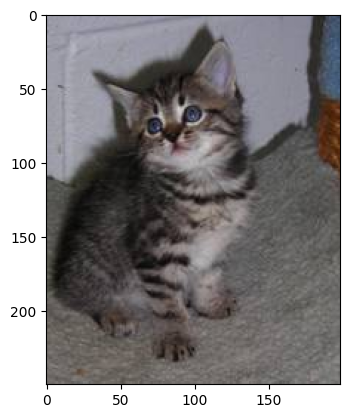

In [19]:
img = mpimg.imread('/content/train/cat.1073.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
cat
dog
cat


In [21]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [22]:
os.mkdir('/content/image resized')

In [23]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

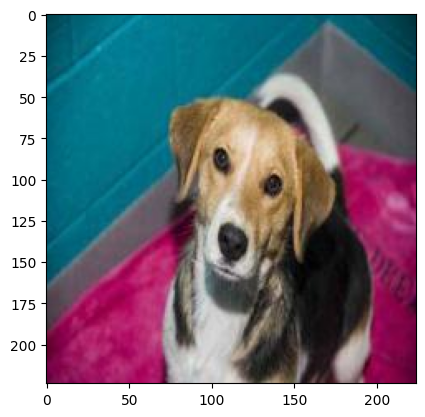

In [34]:
img = mpimg.imread('/content/image resized/dog.6532.jpg')
imgplt = plt.imshow(img)
plt.show()

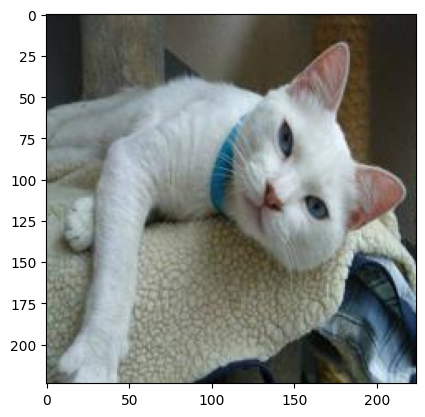

In [41]:
img = mpimg.imread('/content/image resized/cat.2762.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [42]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [43]:
print(filenames[0:5])
print(len(filenames))

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg']
2000


In [44]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [45]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [46]:
import cv2
import glob

In [47]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [48]:
print(dog_cat_images)

[[[[250 253 255]
   [250 253 255]
   [250 253 255]
   ...
   [196 186 169]
   [189 179 162]
   [178 168 151]]

  [[252 253 255]
   [252 253 255]
   [252 253 255]
   ...
   [183 173 156]
   [186 176 159]
   [187 177 160]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [183 173 156]
   [187 177 160]
   [191 181 164]]

  ...

  [[ 59  75 122]
   [ 58  74 121]
   [ 55  71 118]
   ...
   [252 254 254]
   [251 253 253]
   [251 253 253]]

  [[ 22  37  86]
   [ 22  37  86]
   [ 24  39  88]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]

  [[ 45  60 109]
   [ 41  56 105]
   [ 38  53 102]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]]


 [[[198 219 220]
   [191 212 213]
   [189 211 209]
   ...
   [187 195 195]
   [187 194 197]
   [187 194 197]]

  [[194 216 214]
   [189 211 209]
   [189 211 209]
   ...
   [187 194 197]
   [187 194 197]
   [187 194 197]]

  [[192 213 210]
   [189 210 207]
   [191 212 209]
   ...
   [188 194 199]
   [187 193 198]
   [187 193

In [49]:
type(dog_cat_images)

numpy.ndarray

In [50]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [51]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [54]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [55]:
print(X_train_scaled)

[[[[0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  ...

  [[0.25098039 0.22745098 0.41176471]
   [0.24705882 0.23529412 0.41568627]
   [0.25098039 0.23921569 0.41960784]
   ...
   [0.39215686 0.36862745 0.41176471]
   [0.4        0.36862745 0.41176471]
   [0.33333333 0.30980392 0.35294118]]

  [[0.24313725 0.21568627 0.43921569]
   [0.2

Building the Neural Network

In [56]:
import tensorflow as tf
import tensorflow_hub as hub

In [57]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [58]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [60]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 87s 2s/step - loss: 0.2276 - acc: 0.9094
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0651 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.0463 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0362 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0290 - acc: 0.9950


In [61]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0652 - acc: 0.9800
Test Loss = 0.06524790078401566
Test Accuracy = 0.9800000190734863


Predictive System

Path of the image to be predicted: /content/dog.jpg


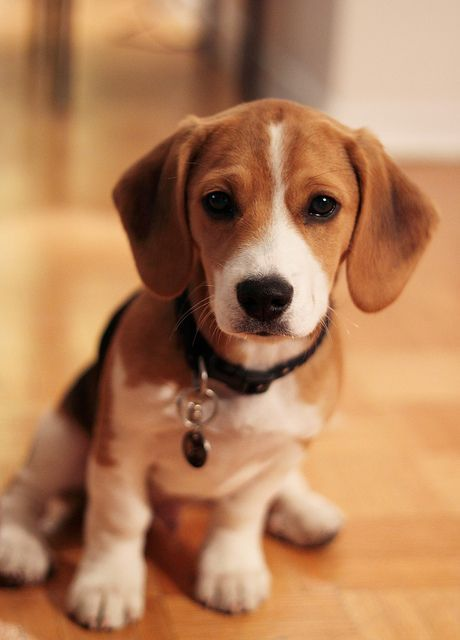

1/1 [==============================] - 0s 53ms/step
[[-4.0760283  3.888399 ]]
1
The image represents a Dog


In [65]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


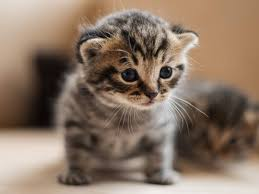

1/1 [==============================] - 0s 54ms/step
[[ 4.038902 -4.341561]]
0
The image represents a Cat


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')